In [207]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import librosa
import subprocess
import librosa.display
import IPython.display as ipd
from tqdm import tqdm 
import os
import pickle
from sklearn.metrics import accuracy_score

# This is just for testing purpose -> to see how librosa work

In [2]:
src=r"C:\Users\MUNDI\ML\ttt.wav"

 # As librosa do not take mp3 file so first convert mp3 to wav file 

In [3]:
r=subprocess.Popen(['ffmpeg', '-i', 'tt.mp3',
                   src])

In [34]:
d,s=librosa.load(src)

# Librosa return data which in normalised form from -1 to 1
# and retrun sample rate by default 22050 for all audio file

# sample rate-> It tell us how many audio sample measurement where taken per second when recording audio

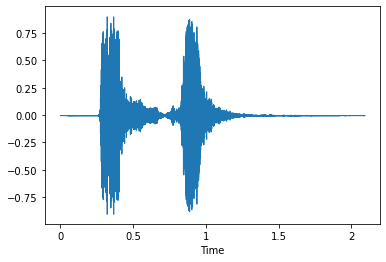

In [5]:
librosa.display.waveshow(d)

In [7]:
ipd.Audio(src)

# mel frequency cepstral coefficients  (mfcc) is important speech data extraction technique 

In [9]:
data=librosa.feature.mfcc(y=d,sr=s,n_mfcc=40)

In [30]:
len(data)

40

In [31]:
data.shape

(40, 91)

In [19]:
d=np.mean(data,axis=1)

In [21]:
d

array([-4.0878049e+02,  8.3556053e+01, -6.9021487e+00, -3.7476907e+00,
       -7.0612040e+00, -5.2409253e+00, -3.2971323e+00,  2.4991772e+00,
       -1.3057612e+00, -2.8907249e+00, -2.1573963e+00,  1.4319751e+00,
       -7.3733294e-01,  9.5140570e-01,  1.6667938e+00,  4.6115121e-01,
       -2.6728153e+00, -4.1509935e-01, -1.8147051e-01,  2.3104613e+00,
        6.2672704e-01, -4.9373651e-01, -4.0291910e+00,  3.3161604e+00,
        3.7912437e-01, -3.5959303e-01,  2.7738397e+00,  1.7016563e+00,
        2.5123215e+00,  6.1367698e+00,  2.8431926e+00,  5.8667173e+00,
        3.9358213e+00,  4.8795815e+00,  4.3412757e+00,  5.0465398e+00,
        5.4048424e+00,  7.3522587e+00,  3.9740205e+00,  3.2998161e+00],
      dtype=float32)

# Preprocessing 
 we will first extract mfcc and save them
 
 we have audio files in ogg format and librosa suppport it so do not need to convert in any other format

In [52]:
x=[]
y=[]

In [51]:
scored_classes = ["akiapo","aniani","apapan","barpet","crehon","elepai"
                  ,"ercfra","hawama","hawcre","hawgoo","hawhaw","hawpet1","houfin"
                  ,"iiwi","jabwar","maupar","omao","puaioh","skylar","warwhe1","yefcan"]

In [53]:
train_audio_dir=r"C:\Users\MUNDI\Downloads\birdclef-2022\train_audio"


for dir in tqdm(os.listdir(train_audio_dir)):
    if dir in scored_classes:
        for file in os.listdir(train_audio_dir+"\\"+dir):
            path=train_audio_dir+"\\"+dir+"\\"+file
            audio_data,audio_sample_rate=librosa.load(path)
            mfcc=librosa.feature.mfcc(y=audio_data,sr=audio_sample_rate,n_mfcc=40)
            mfcc_features=np.mean(mfcc,axis=1)
            x.append(mfcc_features)
            y.append(dir)

100%|██████████████████████████████████████████████████████████████████████████████| 152/152 [1:25:51<00:00, 33.89s/it]


In [57]:
y

['akiapo',
 'akiapo',
 'akiapo',
 'akiapo',
 'akiapo',
 'akiapo',
 'akiapo',
 'akiapo',
 'akiapo',
 'akiapo',
 'akiapo',
 'akiapo',
 'akiapo',
 'akiapo',
 'aniani',
 'aniani',
 'aniani',
 'aniani',
 'aniani',
 'aniani',
 'aniani',
 'aniani',
 'aniani',
 'aniani',
 'aniani',
 'aniani',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'apapan',
 'barpet',
 'barpet',
 'barpet',
 'barpet',
 'barpet',
 'barpet',
 'barpet',
 'barpet',
 'barpet',
 'barpet',
 'barpet',
 'barpet',
 'barpet',
 'barpet',
 'barpet',
 'crehon',
 'crehon',
 'elepai',

In [58]:
pickle.dump(x,open('x_audio.pickle','wb'))

In [62]:
pickle.dump(y,open('y_audio.pickle','wb'))

In [63]:
df=pd.DataFrame(x)

In [65]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-465.289459,50.928574,-15.486423,47.624023,20.449724,9.828522,11.403605,8.694019,2.180347,10.838697,...,2.905817,3.940625,-0.841480,3.366423,-2.972850,1.807016,-1.099831,2.388232,-2.325831,1.767222
1,-440.488525,47.773552,-11.525236,49.973869,3.246995,0.799681,12.092469,-1.730645,-2.692020,11.490460,...,0.046000,4.284616,-2.020228,3.013879,-0.958955,3.275615,-1.458515,2.487757,-0.572855,1.702330
2,-258.577240,64.437912,3.058271,39.505661,5.553773,0.790121,5.250027,11.806835,-2.048054,5.604103,...,-1.489677,4.766726,-2.197211,3.494277,-1.707246,2.288327,-1.598659,1.524327,-1.398692,2.472270
3,-398.962860,18.751194,-20.106989,21.527102,-15.445383,-9.190602,-1.836532,-0.435279,-0.476087,1.856783,...,-3.645985,2.956206,-3.751081,1.249416,-1.474516,0.825774,-2.214372,1.197284,-2.024363,1.866022
4,-373.920654,17.174971,-53.779659,50.260277,-1.216934,-16.715919,0.861780,-3.054137,-7.163657,-3.075752,...,1.874746,2.337518,-3.816642,3.801005,-1.654382,1.612712,-1.124296,3.733957,-1.408068,2.063440


# Model Training

In [72]:
import tensorflow as tf
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split

In [70]:
len(np.unique(y))

21

In [125]:
from collections import Counter
count=Counter(y)

In [127]:
print(count)

Counter({'skylar': 500, 'houfin': 322, 'jabwar': 78, 'warwhe1': 71, 'yefcan': 67, 'apapan': 47, 'iiwi': 37, 'hawama': 21, 'omao': 21, 'hawcre': 20, 'barpet': 15, 'akiapo': 14, 'elepai': 14, 'aniani': 12, 'hawgoo': 9, 'ercfra': 6, 'hawhaw': 3, 'hawpet1': 3, 'puaioh': 3, 'crehon': 2, 'maupar': 1})


# we will delete classes have count less than 5

In [134]:
del_ind=[]
for k in count:
    if count[k]<=5:
        for i in range(len(y)):
            if y[i]==k:
                del_ind.append(i)
            
del_ind            

[88, 89, 160, 161, 162, 163, 164, 165, 603, 625, 626, 627]

In [156]:
new_df=df.drop(del_ind)

In [178]:
new_y=y.copy()

In [180]:
def remove_items(list, item):
    res = [i for i in list if i != item]
    return res

In [184]:
for k in count:
    if count[k]<=5:
        new_y=remove_items(new_y,k)

In [188]:
Counter(new_y)

Counter({'akiapo': 14,
         'aniani': 12,
         'apapan': 47,
         'barpet': 15,
         'elepai': 14,
         'ercfra': 6,
         'hawama': 21,
         'hawcre': 20,
         'hawgoo': 9,
         'houfin': 322,
         'iiwi': 37,
         'jabwar': 78,
         'omao': 21,
         'skylar': 500,
         'warwhe1': 71,
         'yefcan': 67})

In [189]:
len(new_y)

1254

In [190]:
Y=pd.get_dummies(new_y)

In [191]:
Y

,akiapo,aniani,apapan,barpet,elepai,ercfra,hawama,hawcre,hawgoo,houfin,iiwi,jabwar,omao,skylar,warwhe1,yefcan
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1252,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [193]:
x_train,x_test,y_train,y_test=train_test_split(new_df,Y,test_size=.20,random_state=42,stratify=Y)

In [216]:
model=models.Sequential()
model.add(layers.InputLayer(input_shape=(40,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='softmax'))

In [198]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [228]:
model.fit(x_train,y_train,batch_size=32,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
32/32 [==============================] - 1s 16ms/step - loss: 1.0401 - accuracy: 0.6530 - val_loss: 1.4977 - val_accuracy: 0.5976
Epoch 2/100
32/32 [==============================] - 0s 12ms/step - loss: 1.0540 - accuracy: 0.6540 - val_loss: 1.5117 - val_accuracy: 0.5896
Epoch 3/100
32/32 [==============================] - 0s 13ms/step - loss: 1.0477 - accuracy: 0.6590 - val_loss: 1.4914 - val_accuracy: 0.6096
Epoch 4/100
32/32 [==============================] - 0s 13ms/step - loss: 1.0426 - accuracy: 0.6570 - val_loss: 1.5227 - val_accuracy: 0.5936
Epoch 5/100
32/32 [==============================] - 0s 12ms/step - loss: 1.0486 - accuracy: 0.6510 - val_loss: 1.5362 - val_accuracy: 0.6016
Epoch 6/100
32/32 [==============================] - 0s 13ms/step - loss: 1.0317 - accuracy: 0.6600 - val_loss: 1.5075 - val_accuracy: 0.6096
Epoch 7/100
32/32 [==============================] - 0s 13ms/step - loss: 1.0353 - accuracy: 0.6570 - val_loss: 1.5238 - val_accuracy: 0.6175
Epoch 

32/32 [==============================] - 0s 12ms/step - loss: 0.9395 - accuracy: 0.6859 - val_loss: 1.6900 - val_accuracy: 0.5936
Epoch 59/100
32/32 [==============================] - 0s 14ms/step - loss: 0.9190 - accuracy: 0.6879 - val_loss: 1.7211 - val_accuracy: 0.5896
Epoch 60/100
32/32 [==============================] - 0s 13ms/step - loss: 0.9383 - accuracy: 0.6800 - val_loss: 1.7097 - val_accuracy: 0.5777
Epoch 61/100
32/32 [==============================] - 0s 15ms/step - loss: 0.9486 - accuracy: 0.6820 - val_loss: 1.7011 - val_accuracy: 0.6016
Epoch 62/100
32/32 [==============================] - 0s 12ms/step - loss: 0.9329 - accuracy: 0.6780 - val_loss: 1.6952 - val_accuracy: 0.5857
Epoch 63/100
32/32 [==============================] - 0s 12ms/step - loss: 0.9340 - accuracy: 0.6859 - val_loss: 1.7227 - val_accuracy: 0.5817
Epoch 64/100
32/32 [==============================] - 0s 12ms/step - loss: 0.9187 - accuracy: 0.6770 - val_loss: 1.7658 - val_accuracy: 0.5737
Epoch 65/100

In [229]:
prediction=model.predict(x_test)
prediction

array([[4.0961742e-05, 1.9439679e-04, 2.0944173e-02, ..., 3.9727980e-01,
        2.0808190e-02, 3.6994860e-02],
       [1.3726512e-04, 1.6848376e-03, 1.3880359e-02, ..., 1.3034275e-02,
        1.0017590e-03, 3.5382867e-02],
       [9.3400487e-10, 5.3929703e-06, 2.3733754e-05, ..., 7.0319396e-01,
        2.4689512e-05, 1.9348486e-04],
       ...,
       [8.5510031e-08, 2.2266318e-05, 3.4858081e-02, ..., 7.7145541e-01,
        1.4878887e-02, 9.2296172e-03],
       [1.0338084e-06, 1.7247231e-06, 1.3692716e-01, ..., 3.3449194e-01,
        3.8690001e-03, 2.6775974e-01],
       [1.4237291e-04, 4.6541382e-07, 9.6522532e-02, ..., 9.1565542e-02,
        7.2514717e-06, 3.8150235e-03]], dtype=float32)

In [230]:
prediction[0]

array([4.0961742e-05, 1.9439679e-04, 2.0944173e-02, 4.7090103e-05,
       3.6643113e-03, 1.2666691e-04, 1.2088239e-03, 7.4215925e-05,
       2.5597075e-03, 5.0048244e-01, 3.8374416e-03, 8.5670762e-03,
       3.1698109e-03, 3.9727980e-01, 2.0808190e-02, 3.6994860e-02],
      dtype=float32)

In [231]:
y_test.iloc[0]

akiapo     0
aniani     0
apapan     0
barpet     0
elepai     0
ercfra     0
hawama     0
hawcre     0
hawgoo     0
houfin     0
iiwi       0
jabwar     0
omao       0
skylar     1
warwhe1    0
yefcan     0
Name: 1105, dtype: uint8

In [235]:
r=model.evaluate(x_test,y_test)
r

8/8 [==============================] - 0s 8ms/step - loss: 1.8895 - accuracy: 0.5936


[1.8895456790924072, 0.5936254858970642]

In [288]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold,cross_val_score

In [237]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [301]:
kfold = KFold(n_splits=5)

In [292]:
scores=[]

In [302]:
for train_indices, test_indices in kfold.split(new_df, Y):
    x_train, x_test = new_df.iloc[train_indices], new_df.iloc[test_indices]
    y_train, y_test = Y.iloc[train_indices], Y.iloc[test_indices]
    
   
    
    model=models.Sequential()
    model.add(layers.InputLayer(input_shape=(40,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(x_train,y_train,epochs=100,batch_size=32)
    
    score=model.evaluate(x_test,y_test)
    scores.append(score)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 33.0356 - accuracy: 0.1178
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 8.5313 - accuracy: 0.3844
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 2.9173 - accuracy: 0.4321
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 2.1654 - accuracy: 0.4187
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.7465 - accuracy: 0.4826
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.6291 - accuracy: 0.4807
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5046 - accuracy: 0.5172
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4878 - accuracy: 0.5037
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4660 - accuracy: 0.5236
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4256 - accuracy: 0.5171
Epoch 11

32/32 [==============================] - 0s 2ms/step - loss: 0.8112 - accuracy: 0.7246
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7996 - accuracy: 0.7127
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8037 - accuracy: 0.7004
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8094 - accuracy: 0.6949
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8737 - accuracy: 0.6828
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8019 - accuracy: 0.7171
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7549 - accuracy: 0.7283
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7887 - accuracy: 0.7344
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8036 - accuracy: 0.7080
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7982 - accuracy: 0.7348
Epoch 93/100


32/32 [==============================] - 0s 2ms/step - loss: 1.1682 - accuracy: 0.6172
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1995 - accuracy: 0.5924
Epoch 66/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1414 - accuracy: 0.6198
Epoch 67/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1992 - accuracy: 0.6207
Epoch 68/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1464 - accuracy: 0.6190
Epoch 69/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1797 - accuracy: 0.6010
Epoch 70/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2239 - accuracy: 0.5994
Epoch 71/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0736 - accuracy: 0.6492
Epoch 72/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1558 - accuracy: 0.6157
Epoch 73/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1024 - accuracy: 0.6342
Epoch 74/100


32/32 [==============================] - 0s 2ms/step - loss: 1.1695 - accuracy: 0.6048
Epoch 46/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1028 - accuracy: 0.6420
Epoch 47/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1868 - accuracy: 0.6030
Epoch 48/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0534 - accuracy: 0.6267
Epoch 49/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1393 - accuracy: 0.6183
Epoch 50/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0772 - accuracy: 0.6339
Epoch 51/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1183 - accuracy: 0.6415
Epoch 52/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1258 - accuracy: 0.5953
Epoch 53/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1119 - accuracy: 0.6260
Epoch 54/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0685 - accuracy: 0.6106
Epoch 55/100


32/32 [==============================] - 0s 3ms/step - loss: 1.5393 - accuracy: 0.5287
Epoch 27/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5468 - accuracy: 0.4860
Epoch 28/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5305 - accuracy: 0.5032
Epoch 29/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5206 - accuracy: 0.5139
Epoch 30/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4558 - accuracy: 0.5561
Epoch 31/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5153 - accuracy: 0.5067
Epoch 32/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4628 - accuracy: 0.5260
Epoch 33/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4584 - accuracy: 0.5036
Epoch 34/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4579 - accuracy: 0.5330
Epoch 35/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4207 - accuracy: 0.5562
Epoch 36/100


32/32 [==============================] - 0s 3ms/step - loss: 2.2887 - accuracy: 0.4932
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 2.1295 - accuracy: 0.4831
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.8482 - accuracy: 0.5165
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 1.7576 - accuracy: 0.4997
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 1.7045 - accuracy: 0.5258
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 1.6912 - accuracy: 0.5182
Epoch 13/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5771 - accuracy: 0.5258
Epoch 14/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5722 - accuracy: 0.4903
Epoch 15/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4792 - accuracy: 0.5390
Epoch 16/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4395 - accuracy: 0.5541
Epoch 17/100
32

32/32 [==============================] - 0s 2ms/step - loss: 0.8952 - accuracy: 0.6809
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9338 - accuracy: 0.6687
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9417 - accuracy: 0.6840
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9035 - accuracy: 0.6891
Epoch 93/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9355 - accuracy: 0.6768
Epoch 94/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9086 - accuracy: 0.6897
Epoch 95/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0053 - accuracy: 0.6655
Epoch 96/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8667 - accuracy: 0.6887
Epoch 97/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9301 - accuracy: 0.6852
Epoch 98/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9058 - accuracy: 0.6933
Epoch 99/100


In [304]:
scores

[[37.08294677734375, 0.0],
 [8.762044906616211, 0.460317462682724],
 [1.1756938695907593, 0.6269841194152832],
 [1.7485482692718506, 0.5873016119003296],
 [28.568248748779297, 0.06400000303983688],
 [0.7426572442054749, 0.7599999904632568],
 [0.9861481785774231, 0.656000018119812],
 [0.6585251688957214, 0.7839999794960022],
 [0.7775809168815613, 0.7680000066757202],
 [23.078392028808594, 0.04800000041723251],
 [29.48971176147461, 0.21912351250648499],
 [3.3265857696533203, 0.1434262990951538],
 [13.706738471984863, 0.350597620010376],
 [0.9876941442489624, 0.7211155295372009],
 [11.284185409545898, 0.36800000071525574]]